# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : SVM, Logistic, Decision tree, K Nearest Neighbours- IRIS

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier




In [5]:
file = r"C:\Users\USER\1 PGP AI\4 ML\DataSets\Iris.csv"
df = pd.read_csv(file)

In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [9]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

# Data Visualization


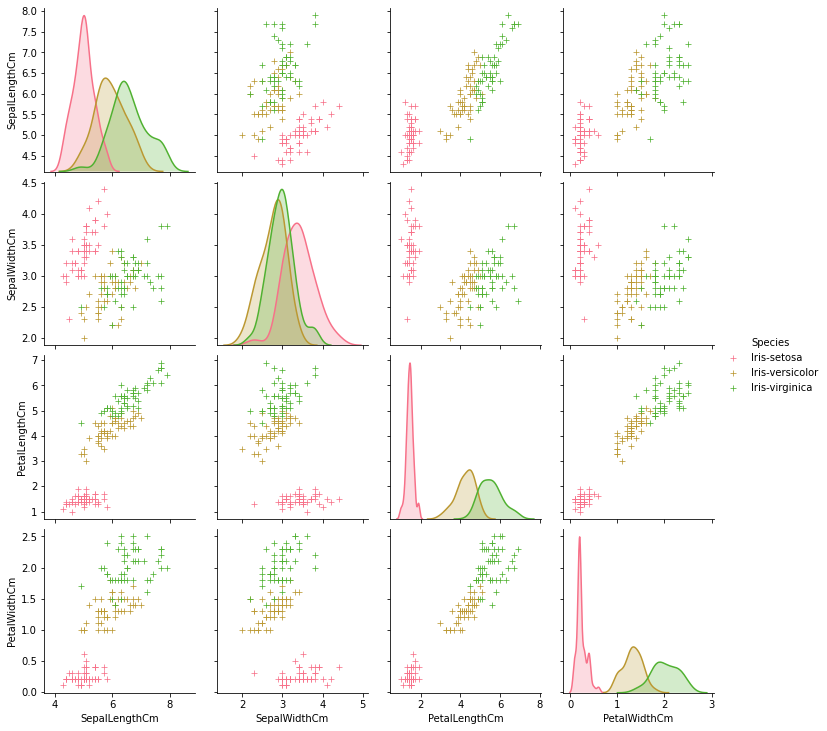

In [11]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green)

Now let us see how are the length and width are distributed

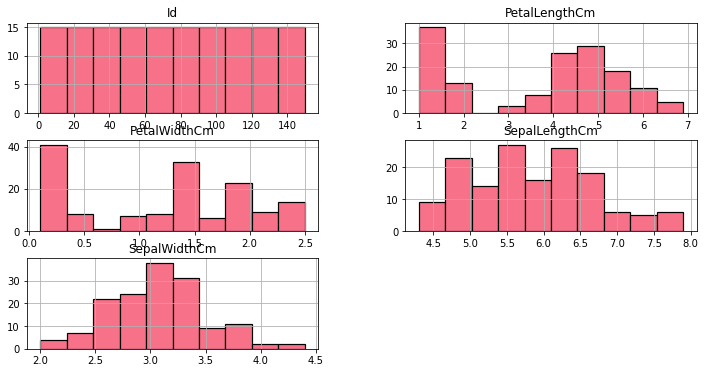

In [12]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Now let us see how the length and width vary according to the species, with violin plot

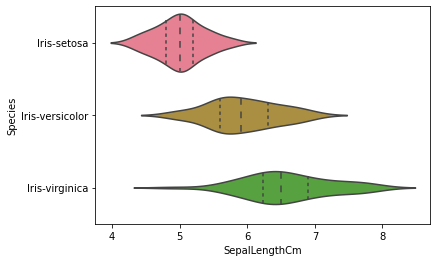

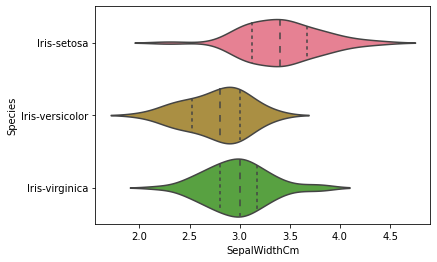

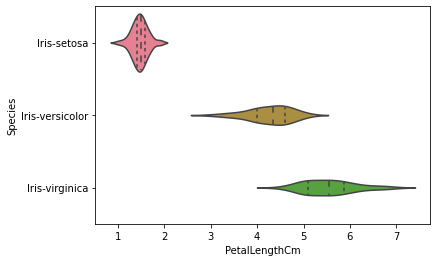

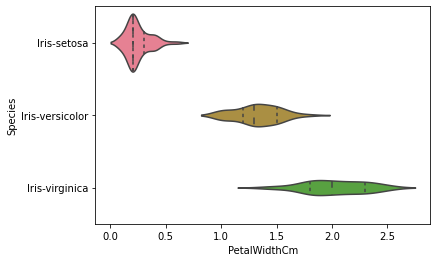

In [13]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

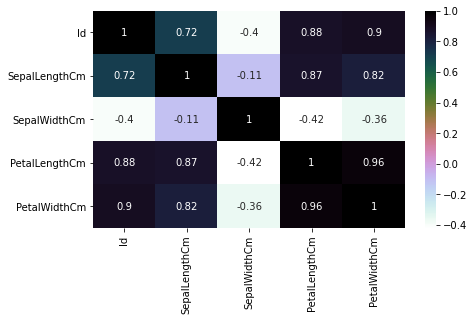

In [14]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True, cmap='cubehelix_r')

plt.show()

Observation--->

The Sepal Width and Length are not correlated, whereas the Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

# Modeling with all Features

Select Features and target

In [15]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

# print(X.head())
print(X.shape)

# print(y.head())
print(y.shape)

(150, 4)
(150,)


Create train and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


## Logistic Regression

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


##  KNN 

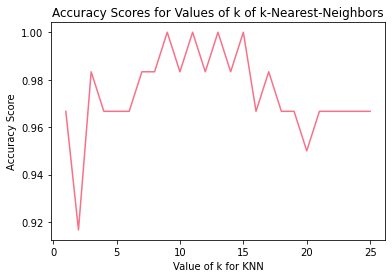

In [19]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


      
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Choosing KNN to Model Iris Species Prediction with k = 12
After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [20]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

## Support Vector Machine (SVM)

In [21]:
model = svm.SVC()
model.fit(X_train, y_train ) 

predicted=model.predict(X_test) 
print('The accuracy of the SVM is:', metrics.accuracy_score(predicted, y_test) )

The accuracy of the SVM is: 0.9833333333333333


## Decision Tree

In [22]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train) 
prediction = model.predict(X_test) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction, y_test))

The accuracy of the Decision Tree using Petals is: 0.9333333333333333


# Modelling with Petals and Sepals Seperately

In [ ]:
petal= df[['PetalLengthCm','PetalWidthCm','Species']]
sepal= df[['SepalLengthCm','SepalWidthCm','Species']]

In [ ]:
# for Petal data
train_p, test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
X_train_p=train_p[['PetalWidthCm','PetalLengthCm']]
X_test_p=test_p[['PetalWidthCm','PetalLengthCm']]

y_train_p=train_p.Species
y_test_p=test_p.Species


# For Sepal data
train_s,test_s = train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
X_train_s = train_s[['SepalWidthCm','SepalLengthCm']]
X_test_s = test_s[['SepalWidthCm','SepalLengthCm']]

y_train_s = train_s.Species
y_test_s = test_s.Species

## SVM

In [ ]:
model_p = svm.SVC()


model = svm.SVC()

model.fit(X_train_p, y_train_p) 
predicted = model.predict(X_test_p) 
print('The accuracy of SVM using Petals is:', metrics.accuracy_score(predicted, y_test_p))

model.fit(X_train_s, y_train_s) 
predicted = model.predict(X_test_s) 
print('The accuracy of SVM using Sepals is:', metrics.accuracy_score(predicted, y_test_s))

## Logistic Regression

In [ ]:
model = LogisticRegression()

model.fit(X_train_p, y_train_p) 
predicted = model.predict(X_test_p) 
print('The accuracy of the Logistic Regression using Petals is:', metrics.accuracy_score(predicted, y_test_p))

model.fit(X_train_s, y_train_s) 
predicted = model.predict(X_test_s) 
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(predicted, y_test_s))

## Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_p, y_train_p) 
predicted = model.predict(X_test_p) 
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(predicted, y_test_p))

model.fit(X_train_s, y_train_s) 
predicted = model.predict(X_test_s) 
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(predicted, y_test_s))

## K-Nearest Neighbours

In [ ]:
model = KNeighborsClassifier(n_neighbors=12) 

model.fit(X_train_p, y_train_p) 
predicted = model.predict(X_test_p) 
print('The accuracy of KNN using Petals is:', metrics.accuracy_score(predicted, y_test_p))

model.fit(X_train_s, y_train_s) 
predicted = model.predict(X_test_s) 
print('The accuracy of KNN using Sepals is:', metrics.accuracy_score(predicted, y_test_s))



Observations:
Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.